## Classification Models for Erythrocyte Characterization Dataset


### @ Author: Shikhar Srivastava


## Analysing Dataset 

##### Class Count 0: 808, 1: 207, 2: 470, 3: 118, 4: 168 

In [225]:
import graphlab as gl

sf= gl.SFrame.read_csv('Use1.csv')

sf

sf.show()

Finished parsing file C:\Users\MAHE\Desktop\scientia_sit_potentia\coursera-notebook\IITKGP\Use1.csv

Parsing completed. Parsed 100 lines in 0.0156 secs.

Finished parsing file C:\Users\MAHE\Desktop\scientia_sit_potentia\coursera-notebook\IITKGP\Use1.csv

Parsing completed. Parsed 1772 lines in 0.02486 secs.

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[float,float,float,float,float,float,float,float,float,float,float,float,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
Canvas is accessible via web browser at the URL: http://localhost:60392/index.html
Opening Canvas in default web browser.


### PrettyPrinting Table 

In [136]:
%matplotlib qt4
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from sklearn.decomposition import KernelPCA as kpca
import numpy as np
print (__doc__)


Automatically created module for IPython interactive environment


### Loading Data

In [156]:
f = open("apnea_data_2_train_ed.csv")
data =  np.loadtxt(fname = f, delimiter = ',',dtype='double')
print data.shape
X = data[:, :data.shape[1]-1] 
Y = data[:,data.shape[1]-1]
print X.shape, Y.shape

(300L, 16L)
(300L, 15L) (300L,)


In [157]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

### Principal Component Analysis of Dataset

In [158]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(18, 10))
ax = Axes3D(fig, elev=-150, azim=110)
PCA_var = PCA(n_components='mle')
X_reduced =PCA_var.fit_transform(X)
print 'MLE Method Parameters Chosen: ',PCA_var.n_components_
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.spectral)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

MLE Method Parameters Chosen:  14


In [142]:
fig = plt.figure(1, figsize=(18, 10))
ax = Axes3D(fig, elev=-150, azim=110)
PCA_var= kpca(n_components=14,kernel='linear')
X_reduced =PCA_var.fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.spectral)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [159]:
np.savetxt("apnea_data_2_train_linear_pca_14.csv", X_reduced, delimiter=",")

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


names = ["Nearest Neighbors", "RBF SVM", "Decision Tree",
         "Random Forest", "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(2),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2),
    GaussianNB()]

X= PCA(n_components=2).fit_transform(X)
figure = plt.figure(figsize=(20, 18))
i = 1
# preprocess dataset, split into training and test part
# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4)

# just plot the dataset first
cm = plt.cm.spectral
ax = plt.subplot(2,2,1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.spectral)
ax.set_title('Training Set')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# and testing points
ax = plt.subplot(2,2,2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, alpha=0.6) # alpha represents color intensity
ax.set_title('Test set')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

colors = "bry"
h = .02  # step size in the mesh
# Now creating the required Mesh for the classifier outputs
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

i=1
figure = plt.figure(figsize=(25, 22))
# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(3,3, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print clf.classes_ 
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print Z.shape,i
    if(len(Z.shape)>1):
        Z=Z[:,1].reshape(xx.shape)
    else:
        Z= Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z,cmap=plt.cm.Paired, alpha=.8)
    plt.axis('tight')

    # Plot also the training points
    
    ## ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.spectral,alpha=0.1)
    # and testing points

    a = np.array(y_test, dtype=np.int64)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=a, cmap=plt.cm.Spectral,
               alpha=2)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(x_max- .3, y_min + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i+=1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

[ 0.  1.]
(153550L,) 1
[ 0.  1.]
(153550L,) 2
[ 0.  1.]
(153550L,) 3
[ 0.  1.]
(153550L,) 4
[ 0.  1.]
(153550L,) 5


### Reloading Data

[  4.03146755e+03   2.01315340e+02   8.01574319e-04   2.80735056e-07
   1.61888307e-10   4.67871914e-11   1.46453992e-19   3.88479097e-14
   2.02726306e-20   9.45681377e-01   4.99885945e+01   9.07560634e-01]
[  5.85642959e+03   2.12458306e+02   3.53914781e-04   1.02431603e-06
   1.44219220e-09   4.12606257e-10   4.04861635e-18   9.96158691e-13
   3.29962742e-18   6.29670731e+00   5.13241106e+01   1.03579326e-01]
y_score:  [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]
y_test:  [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]


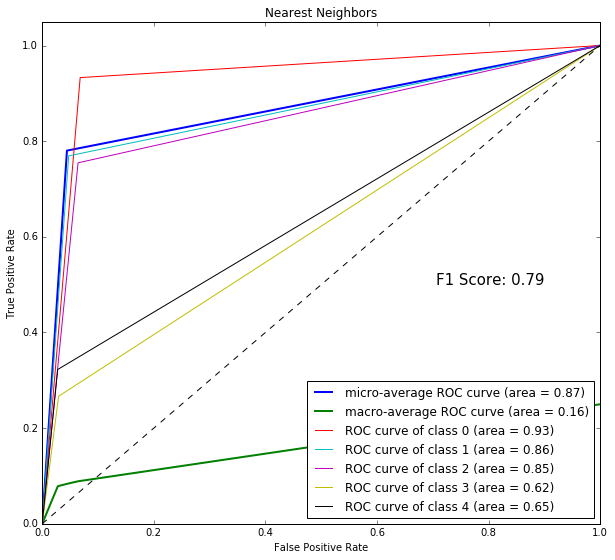

y_score:  [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]
y_test:  [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]


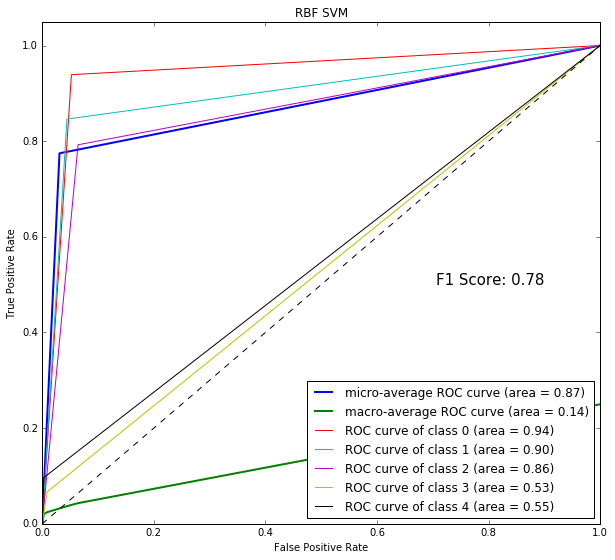

y_score:  [[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 1 0 0 0]
 [1 0 1 0 0]
 [1 0 0 0 0]]
y_test:  [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]


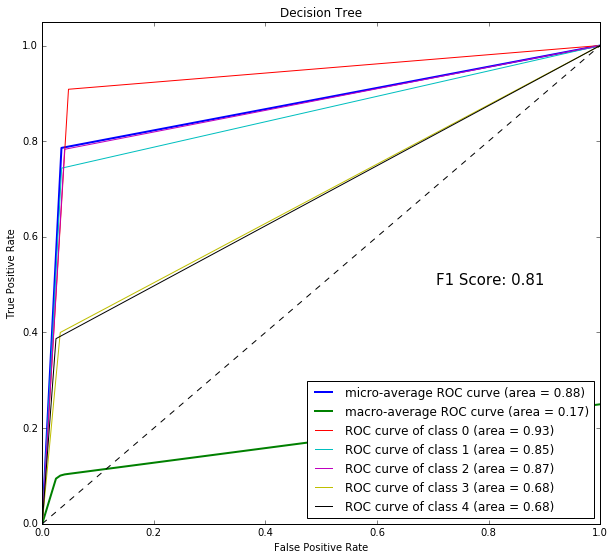

y_score:  [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]]
y_test:  [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]


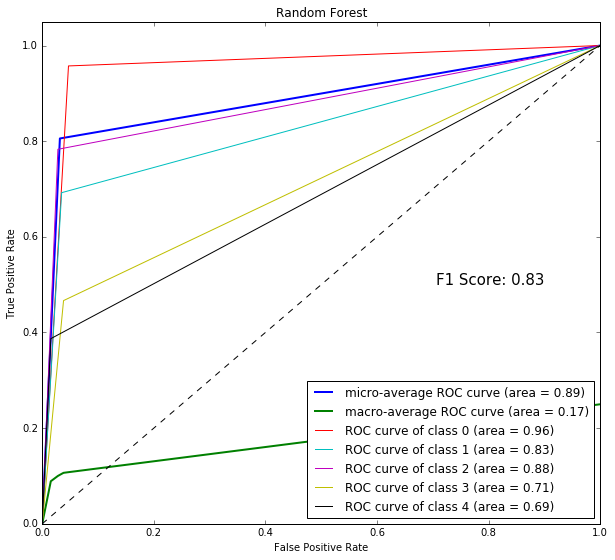

y_score:  [[1 0 0 1 1]
 [0 1 0 1 1]
 [0 1 0 1 1]
 ..., 
 [0 1 0 1 1]
 [1 0 0 0 0]
 [1 0 0 1 1]]
y_test:  [[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ..., 
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]


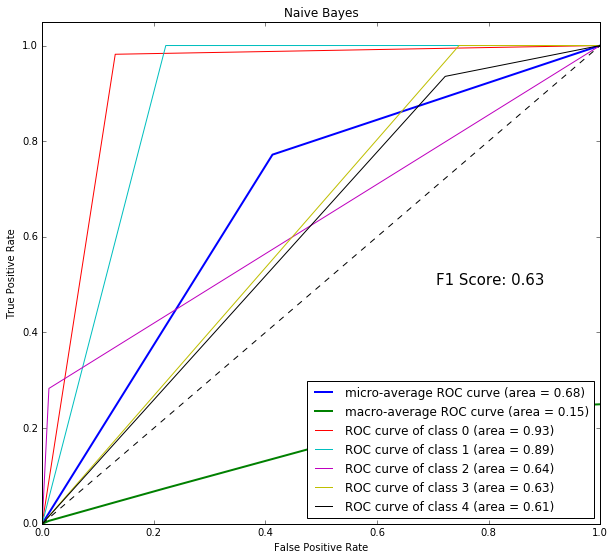

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc,roc_auc_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from scipy import interp

%matplotlib inline
f = open("Use1.csv")
f.readline()  # skip the header
data =  np.loadtxt(fname = f, delimiter = ',',dtype='double')

X = data[:, :12]
Y = data[:,12]

mean = X.mean(axis=0)
print mean
std = X.std(axis=0)
print std
X = (X - mean) / std

#### Changing Output Shape

Y=Y.astype(int)
n_values = np.max(Y) + 1
Y= np.eye(n_values)[Y]

Y=Y.astype(int)
n_classes = Y.shape[1]

from sklearn.decomposition import PCA
# X= PCA(n_components=3).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

### Using all Principal Components for Classifier Comparison

names = ["Nearest Neighbors", "RBF SVM", "Decision Tree",
         "Random Forest", "Naive Bayes"]
classifiers = [
    OneVsRestClassifier(KNeighborsClassifier(3)),
    OneVsRestClassifier(SVC(gamma=2, C=1)),
    OneVsRestClassifier(DecisionTreeClassifier(max_depth=5)),
    OneVsRestClassifier(RandomForestClassifier(max_depth=5, n_estimators=10, max_features=)),
    OneVsRestClassifier(GaussianNB())]

for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    y_score=clf.predict(X_test)
    print 'y_score: ',y_score
    print 'y_test: ',y_test
    score=f1_score(y_test,y_score,average='weighted')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i],tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])     
    # First aggregate all false positive rates
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    # Plot all ROC curves
    plt.figure(figsize=(10, 9))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             linewidth=2)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             linewidth=2)
    plt.text(0.9,0.5, ('F1 Score: %.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc="lower right")
    plt.show()

### ROC Curve

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc,roc_auc_score,f1_score
from scipy import interp

%matplotlib inline

5
